In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

In [126]:
raw_df = pd.read_csv('Data/Therealmonsieurtuna.csv')


In [127]:
raw_df.to_csv('Rawdata.csv', index=False)

In [128]:
raw_df

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,830160855463940,Làm ơn đừng bắt tôi vào hang nữa 👨‍🦽👨‍🦽👨‍🦽,Làm ơn đừng bắt tôi vào hang nữa 👨‍🦽👨‍🦽👨‍🦽,NaN,NaN,2023-11-12 13:51:00,1699771860,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,https://www.facebook.com/Therealmonsieurtuna/p...,"{'thích': 9409, 'yêu thích': 338, 'haha': 9870...",19869,NaN,101581401649287,NaN,8.301605e+14,['830160472130645'],False,2023-11-15 07:35:36.014518
1,825112509302108,Phong ấn người bạn nhỏ để cuối tháng mở khóa s...,Phong ấn người bạn nhỏ để cuối tháng mở khóa s...,NaN,NaN,2023-11-01 20:17:39,1698844659,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,https://www.facebook.com/Therealmonsieurtuna/p...,"{'thích': 6619, 'yêu thích': 130, 'haha': 9775...",16820,NaN,101581401649287,NaN,8.251123e+14,['825112305968795'],False,2023-11-15 07:35:55.678862
2,823501229463236,"17h30 xin nhắc lại 17h30, tức 5h30 chiều\nChưa...","17h30 xin nhắc lại 17h30, tức 5h30 chiều\nChưa...",NaN,NaN,2023-10-29 12:38:58,1698557938,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,https://www.facebook.com/Therealmonsieurtuna/p...,"{'thích': 6063, 'yêu thích': 893, 'haha': 4602...",11677,NaN,101581401649287,NaN,8.235011e+14,['823501056129920'],False,2023-11-15 07:36:28.074605
3,818575399955819,"Mừng ngày phụ nữ, tặng em quả tim <3\n\nChờ tí...","Mừng ngày phụ nữ, tặng em quả tim <3\n\nChờ tí...",NaN,NaN,2023-10-20 07:55:50,1697763350,NaN,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,[],...,https://www.facebook.com/Therealmonsieurtuna/p...,"{'thích': 10035, 'yêu thích': 2069, 'haha': 11...",23870,NaN,101581401649287,NaN,8.185752e+14,['818575236622502'],False,2023-11-15 07:36:37.120660
4,807488621064497,Chú Bé Quàng Khăn Đỏ Và Chó Sói (99% chó +1% s...,Chú Bé Quàng Khăn Đỏ Và Chó Sói (99% chó +1% s...,NaN,NaN,2023-09-29 09:00:04,1695952804,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/Therealmonsieurtuna/p...,"{'thích': 3308, 'yêu thích': 95, 'haha': 4501,...",7990,NaN,101581401649287,NaN,8.074886e+14,['807488601064499'],False,2023-11-15 07:37:03.344358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,317704103370348,Cảm ơn anh Tuân vì đã làm youtube ❤️\nCre: Tôi...,Cảm ơn anh Tuân vì đã làm youtube ❤️\nCre: Tôi...,NaN,NaN,2021-07-30 15:12:39,1627632759,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,...,NaN,NaN,0,NaN,101581401649287,NaN,3.177039e+14,['317703946703697'],False,NaN
96,317060340101391,Cre: Dung Dung,Cre: Dung Dung,NaN,NaN,2021-07-29 15:53:04,1627548784,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,NaN,NaN,0,NaN,101581401649287,NaN,3.170603e+14,['317060280101397'],False,NaN
97,316397833500975,"Thần đồng toán học, phù thuỷ những con số =))\...","Thần đồng toán học, phù thuỷ những con số =))\...",NaN,NaN,2021-07-28 14:49:24,1627458564,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,NaN,NaN,0,NaN,101581401649287,NaN,3.163967e+14,['316396710167754'],False,NaN
98,315718963568862,Nay nghiêm túc xíu\nCre: Admin cute nhất vũ trụ,Nay nghiêm túc xíu\nCre: Admin cute nhất vũ trụ,NaN,NaN,2021-07-27 14:52:44,1627372364,https://scontent

Kiểm tra và loại bỏ những dữ liệu trùng lặp

In [129]:
raw_df = raw_df.drop_duplicates()

Loại bỏ các cột không cần thiết

In [130]:
columns_drop = ['factcheck', 'shared_post_id', 'video_duration_seconds', 'video_height', 'video_quality', 'video_size_MB', 'video_watches', 'video_width', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url', 'sharers', 'shared_text', 'original_text']

raw_df = raw_df.drop(columns=columns_drop)


Chuẩn hóa định dạng thời gian của cột 'time' và 'fetched_time'

In [131]:
raw_df['time'] = pd.to_datetime(raw_df['time'])
raw_df['fetched_time'] = pd.to_datetime(raw_df['fetched_time'])

Chuyển cột 'reactors' thành danh sách những người tương tác

In [132]:
raw_df['reactors'] = raw_df['reactors'].apply(lambda x: ast.literal_eval(str(x)) if pd.notnull(x) else [])


Chuyển cột 'video_id' và 'image_id' thành kiểu dữ liệu int64

In [133]:
raw_df['video_id'] = raw_df['video_id'].astype('Int64')
raw_df['image_id'] = raw_df['image_id'].astype('Int64')

Tách các từ trong cột 'text' của dữ liệu

In [134]:
text_word = pd.Series(raw_df['text'].to_list()).astype(str)
word = (" ".join(text_word)).lower().split()

Tính độ dài của nội dung từng bài viết

In [135]:
raw_df['post_text_length'] = raw_df['text'].apply(len)

In [136]:
raw_df.to_csv('Data_after_preprocessing.csv', index=False)

So sánh số lượng của từng loại tương tác trong tất cả các bài đăng

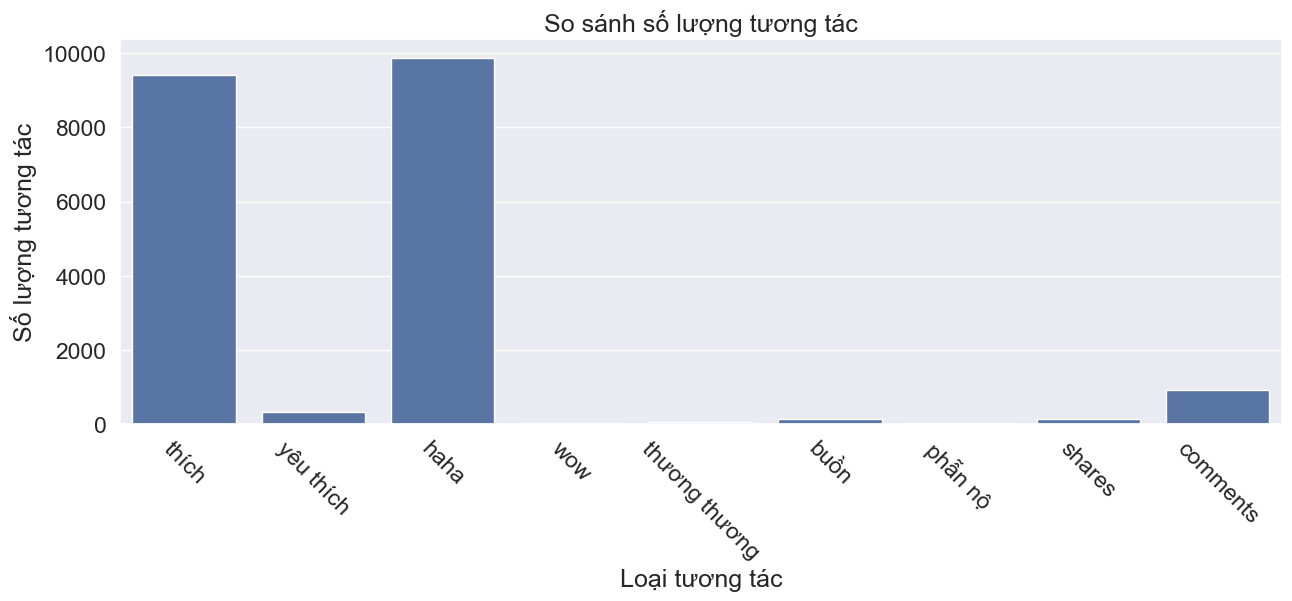

In [137]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("So sánh số lượng tương tác")
ax.set_ylabel("Số lượng tương tác")
ax.set_xlabel("Loại tương tác")
plt.xticks(rotation=-45)
plt.show()

Bài viết có lượt tương tác nhiều nhất

In [138]:
max_interaction_post = raw_df[raw_df['reaction_count'] == raw_df['reaction_count'].max()]

print("Bài viết có lượt tương tác lớn nhất:")
print(max_interaction_post['text'])


Bài viết có lượt tương tác lớn nhất:
69    Khẩu Nghiệp Cả Thế Giới\nĐối tượng đầu tiên: Q...
Name: text, dtype: object


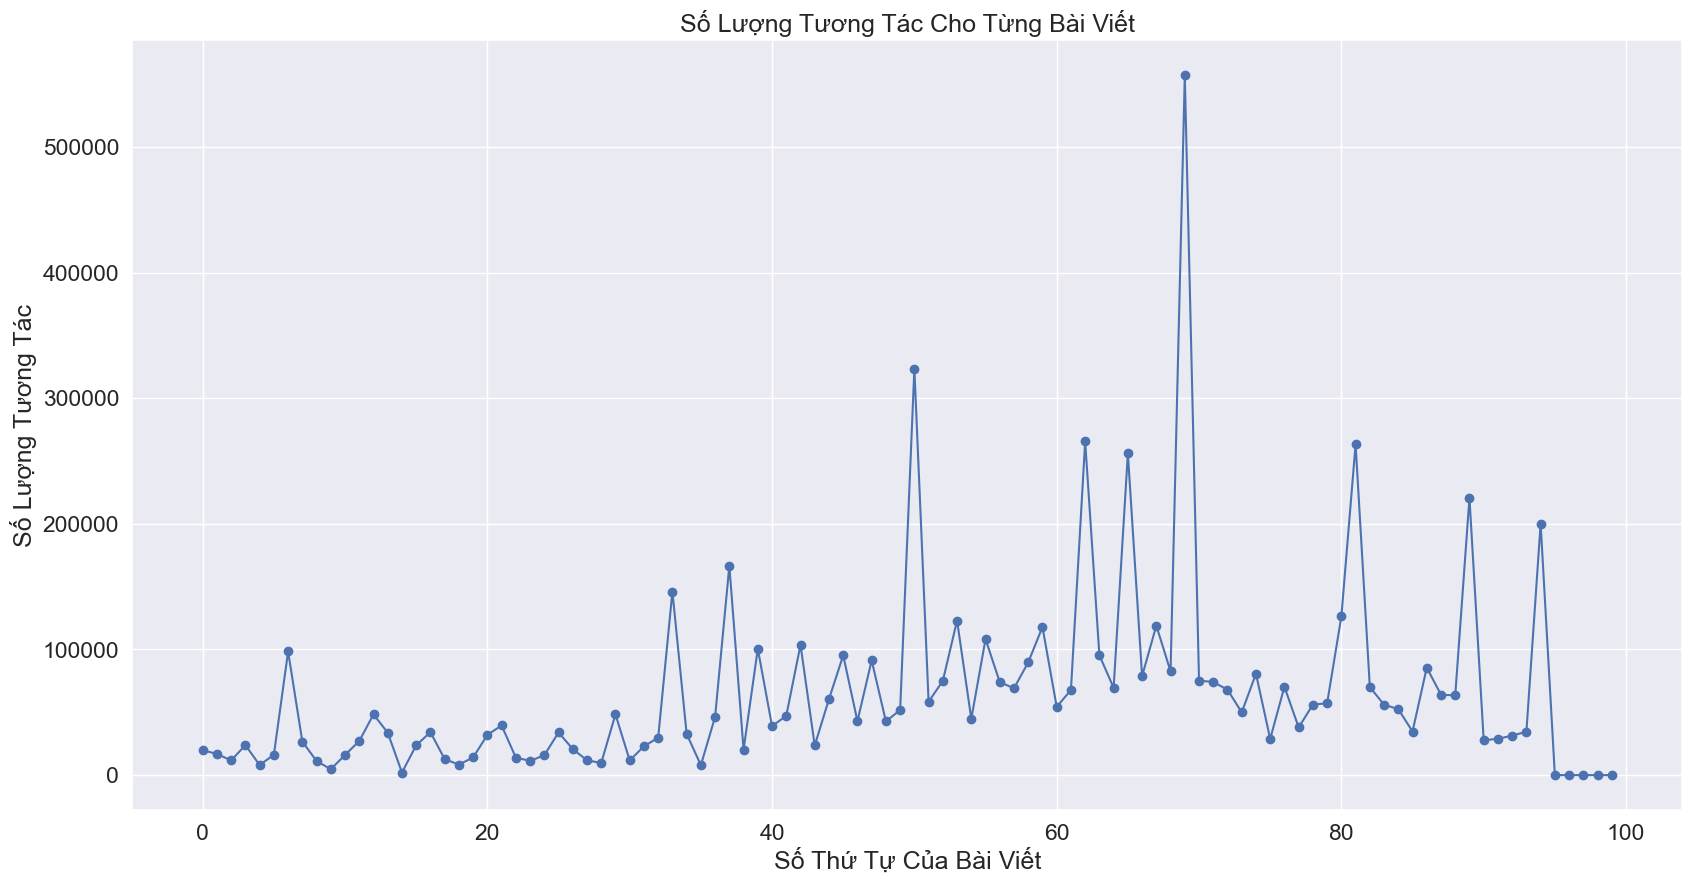

In [139]:
plt.figure(figsize=(20, 10))
plt.plot(raw_df.index, raw_df['reaction_count'], marker='o', linestyle='-', color='b')
plt.xlabel('Số Thứ Tự Của Bài Viết')
plt.ylabel('Số Lượng Tương Tác')
plt.title('Số Lượng Tương Tác Cho Từng Bài Viết')
plt.show()

Các mốc thời gian mà Page thường đăng bài

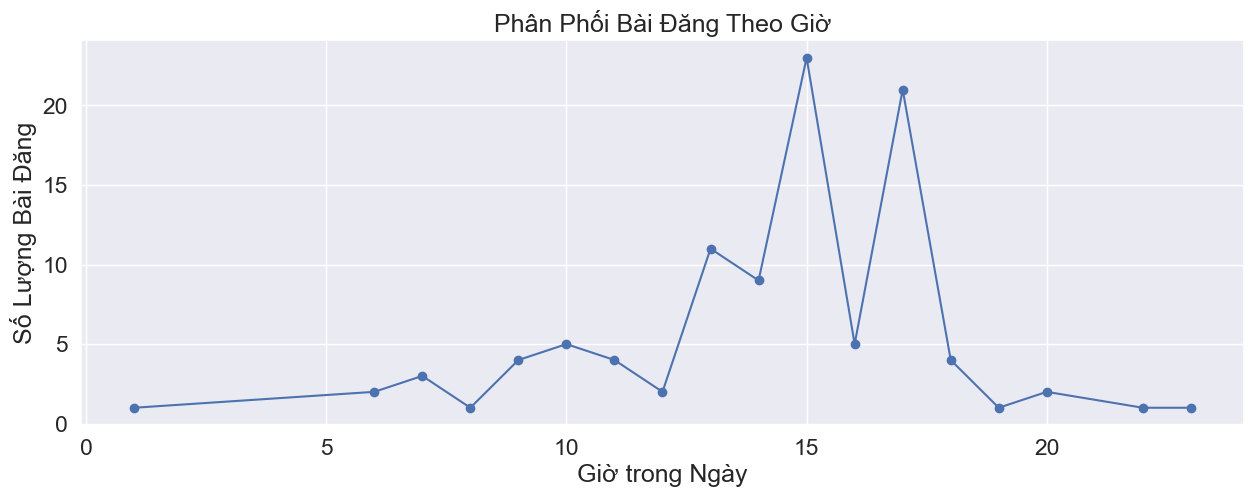

In [140]:
raw_df['hour'] = raw_df['time'].dt.hour
posts_by_hour = raw_df.groupby('hour').size()

plt.plot(posts_by_hour.index, posts_by_hour.values, marker='o')
plt.xlabel('Giờ trong Ngày')
plt.ylabel('Số Lượng Bài Đăng')
plt.title('Phân Phối Bài Đăng Theo Giờ')
plt.show()


Tần suất đăng bài của page theo thời gian

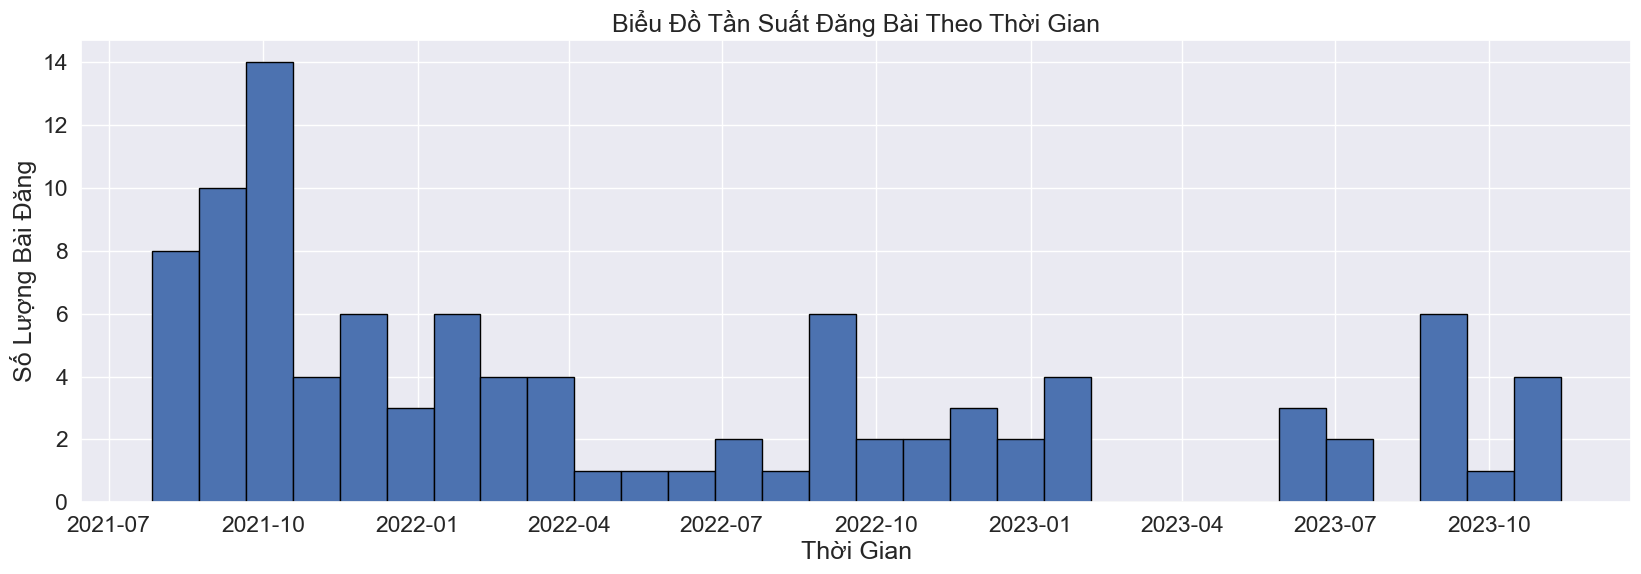

In [141]:
plt.figure(figsize=(20, 6))
plt.hist(raw_df['time'], bins=30, edgecolor='black')
plt.xlabel('Thời Gian')
plt.ylabel('Số Lượng Bài Đăng')
plt.title('Biểu Đồ Tần Suất Đăng Bài Theo Thời Gian')
plt.show()

Tỉ lệ phần trăm số lần đăng bài trong từng năm

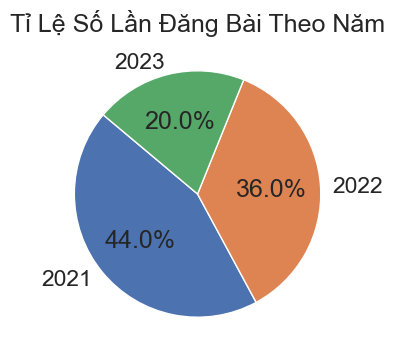

In [142]:
raw_df['year'] = raw_df['time'].dt.year
yearly_post_counts = raw_df['year'].value_counts(normalize=True)
plt.figure(figsize=(4, 4))
plt.pie(yearly_post_counts, labels=yearly_post_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ Lệ Số Lần Đăng Bài Theo Năm')
plt.show()

Sự thay đổi của số lượt tương tác theo thời gian

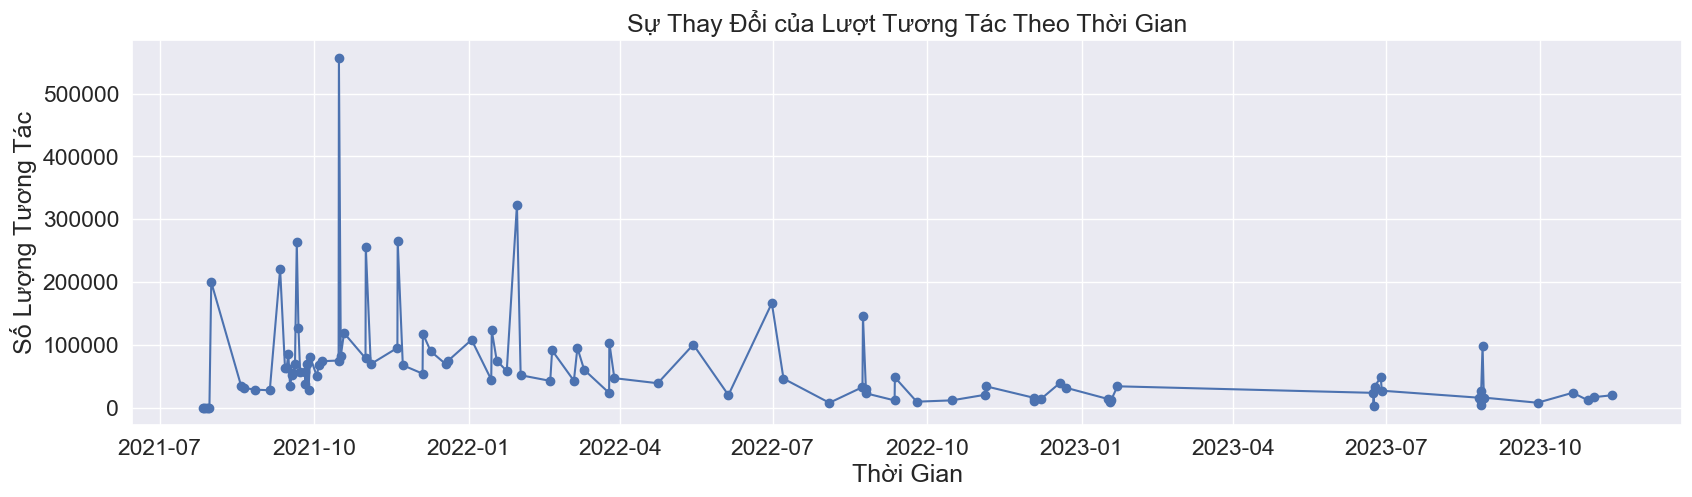

In [143]:
plt.figure(figsize=(20, 5))
plt.plot(raw_df['time'], raw_df['reaction_count'], marker='o', linestyle='-', color='b')
plt.xlabel('Thời Gian')
plt.ylabel('Số Lượng Tương Tác')
plt.title('Sự Thay Đổi của Lượt Tương Tác Theo Thời Gian')
plt.show()


Sự liên hệ giữa số lượng reaction với số lượng comment, độ dài nội dung bài đăng và lượt chia sẻ

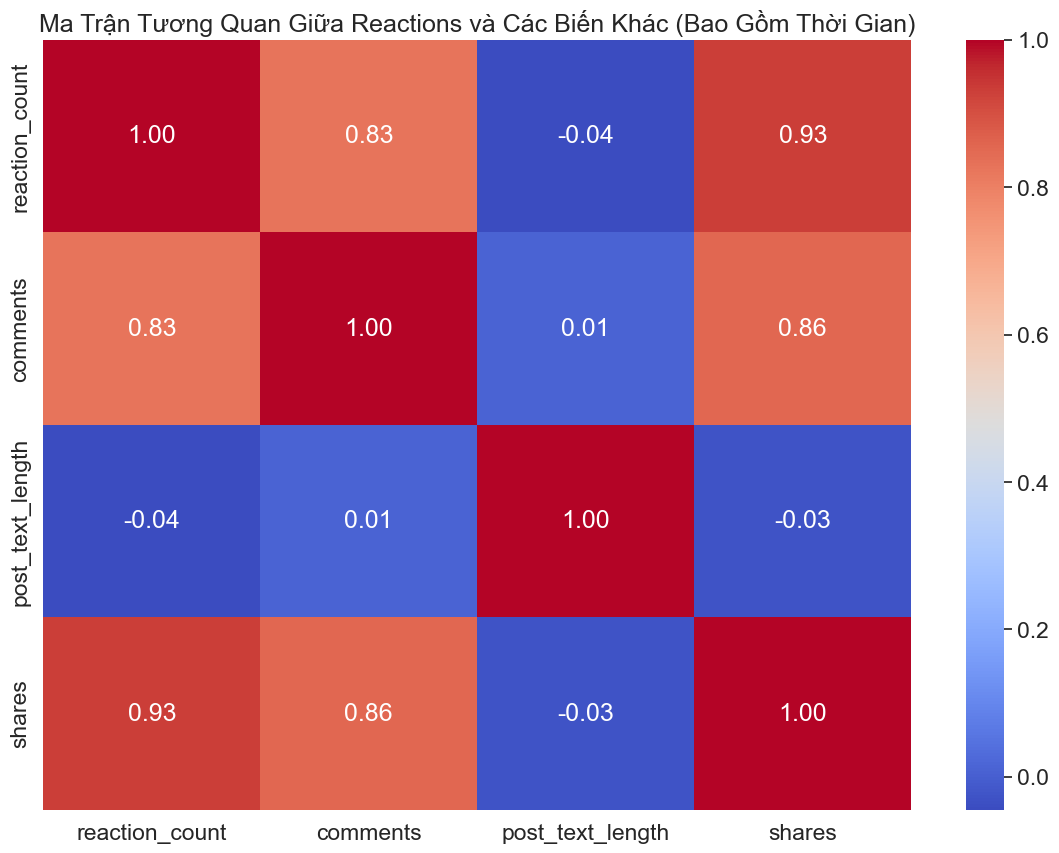

In [144]:
correlation_matrix = raw_df[['reaction_count', 'comments', 'post_text_length', 'shares']].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma Trận Tương Quan Giữa Reactions và Các Biến Khác (Bao Gồm Thời Gian)')
plt.show()

Top 10 từ khóa xuất hiện nhiều nhất trong các bài đăng

In [145]:
word_count = Counter(word)


top_keywords = word_count.most_common(10)


print(top_keywords)

[('tôi', 34), ('bạn', 25), ('cho', 17), ('tuna', 17), ('như', 17), ('monsieur', 16), ('con', 16), ('các', 16), ('cre:', 16), ('được', 15)]
